In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("projects/loan_prediction/train.csv")

In [3]:
df_test = pd.read_csv("projects/loan_prediction/test.csv")

In [4]:
#Copying the data if we want to make any changes original data will not effect
train = df_train.copy()
test = df_test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
print('Shape of train:',train.shape)
print('Shape of test:', test.shape)

Shape of train: (614, 13)
Shape of test: (367, 12)


# Univariate Analysis
It is simplest form of Analysing data where we examine each variable individually

In [8]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

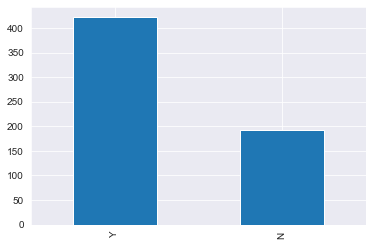

In [10]:
train['Loan_Status'].value_counts().plot.bar();

# Plots for Categorical Variables

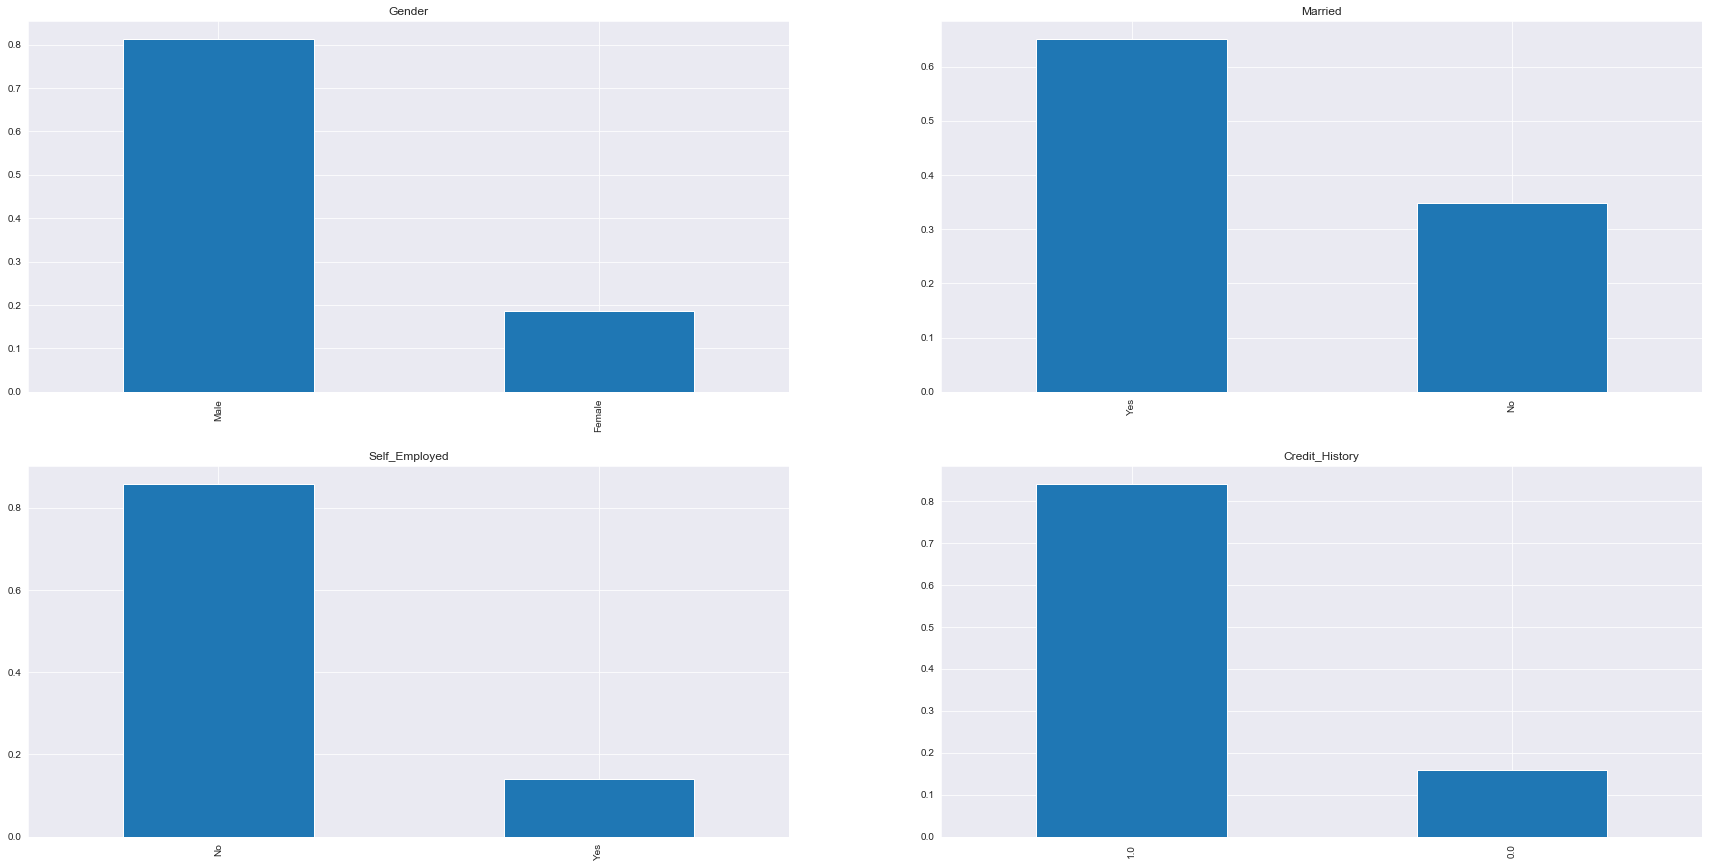

In [11]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(30,15), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

# Plots for ordinal variables

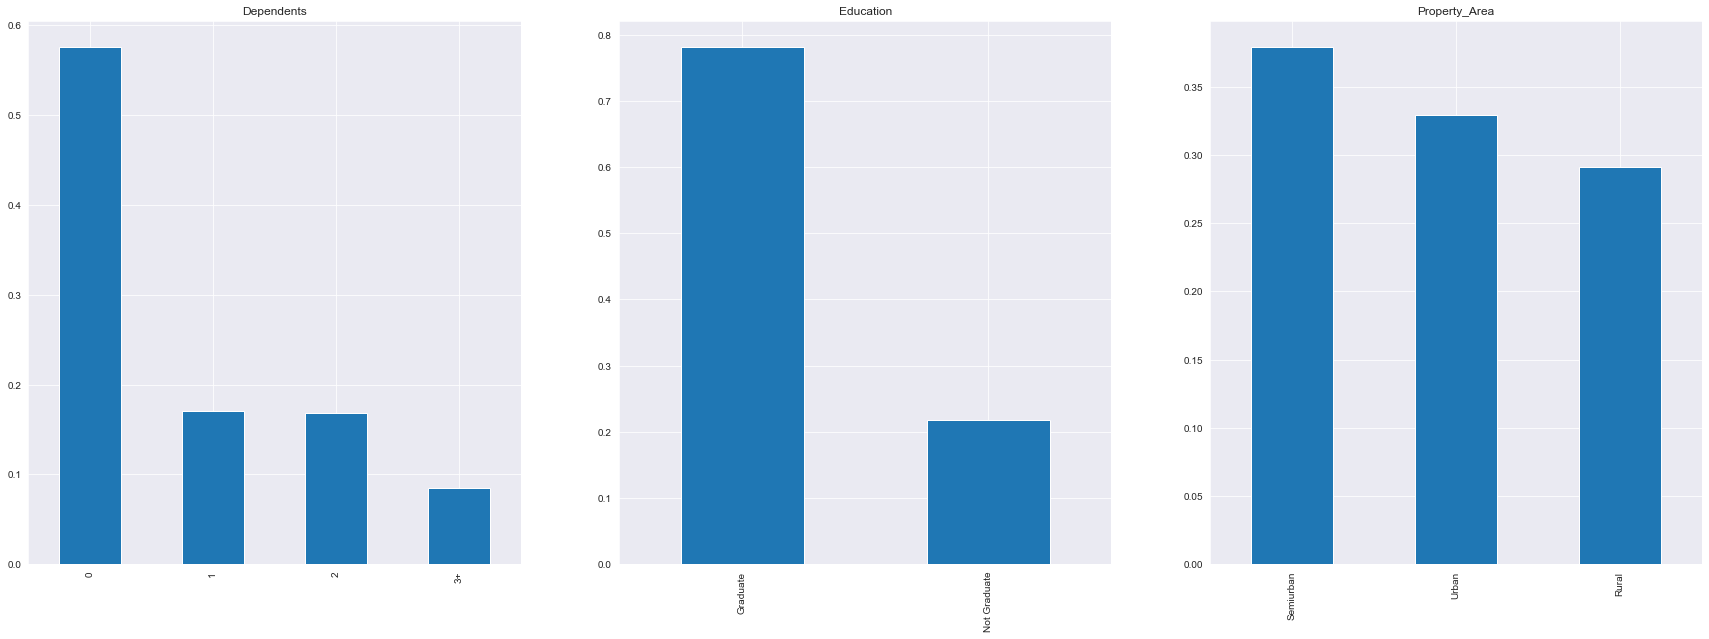

In [12]:
plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(30,10), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

## Plots for numerical variables

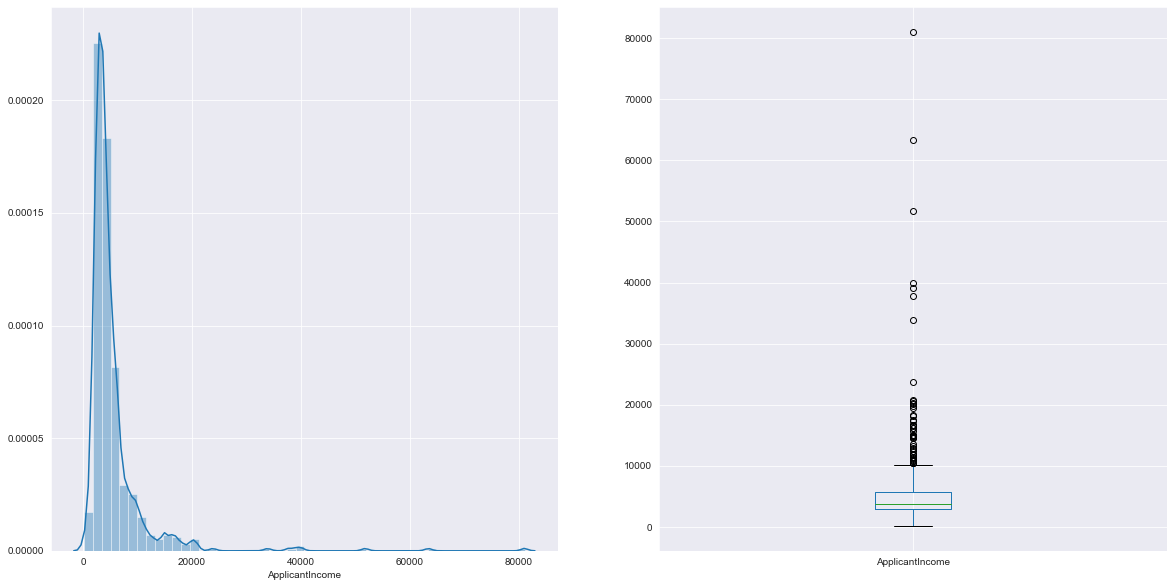

In [13]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(20,10)) 
plt.show()

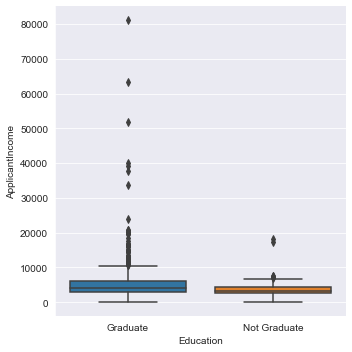

In [14]:
sns.catplot(x='Education', y='ApplicantIncome',kind='box',dodge=False,data=train);

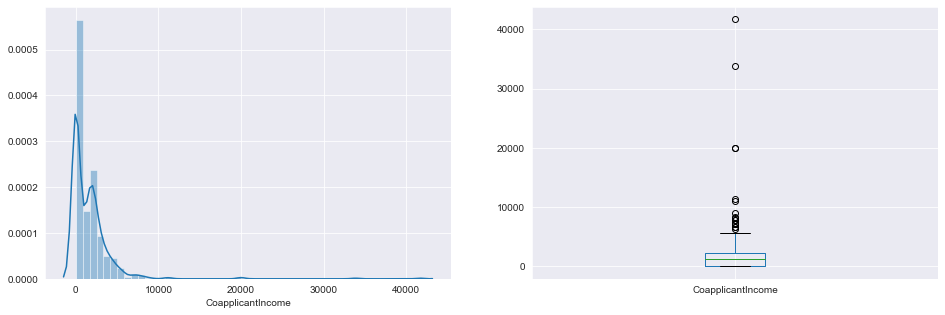

In [15]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

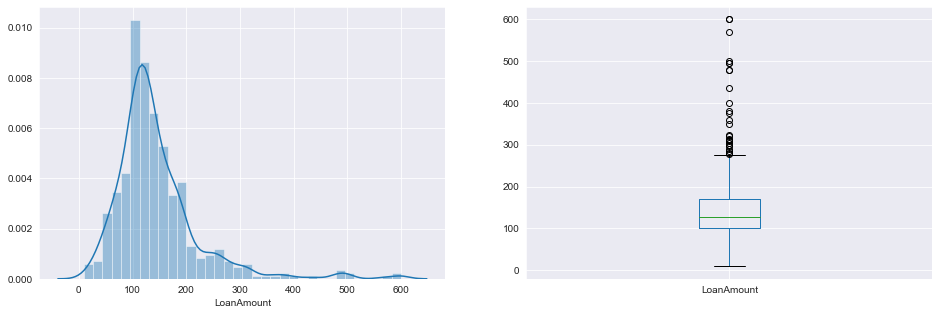

In [16]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis

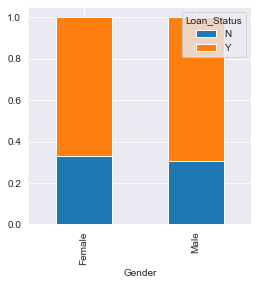

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


Married=pd.crosstab(train['Married'],train['Loan_Status']) 

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 

Education=pd.crosstab(train['Education'],train['Loan_Status']) 

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

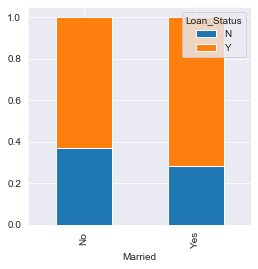

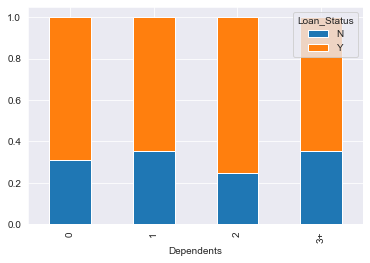

In [21]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

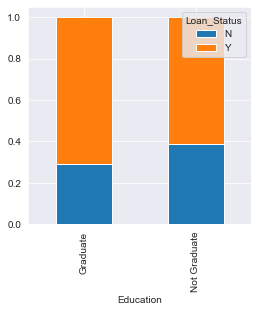

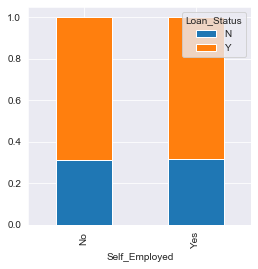

In [22]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

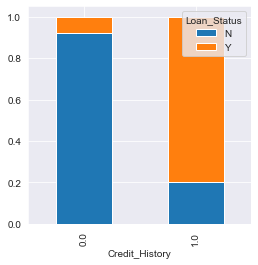

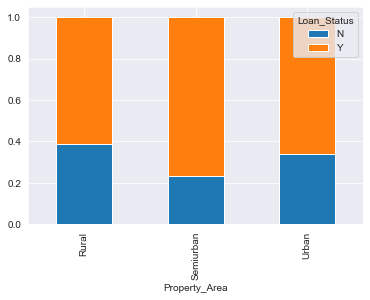

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 


Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

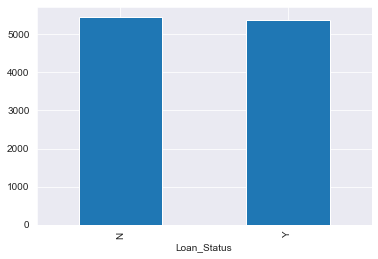

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar();

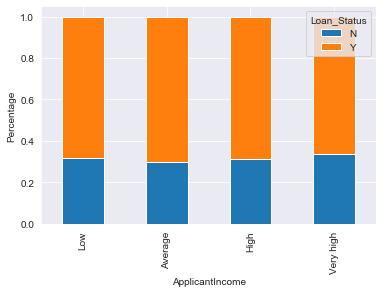

In [25]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')
plt.show()

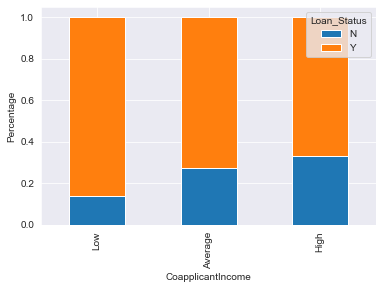

In [26]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 

train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
plt.ylabel('Percentage')
plt.show()

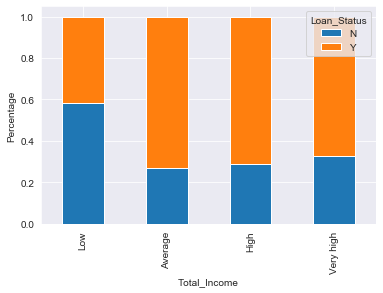

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')
plt.show()

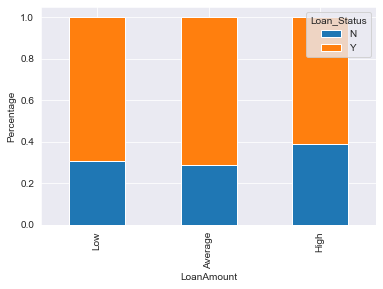

In [28]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 

train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')
plt.show()

In [29]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [30]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)

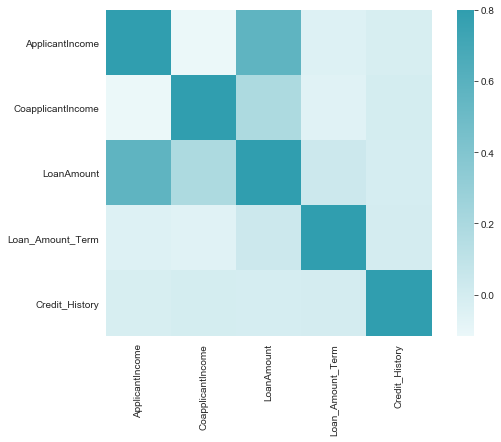

In [31]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
cmap = sns.light_palette((210, 90, 60), input="husl", as_cmap=True)
sns.heatmap(matrix, vmax=.8, square=True, cmap=cmap);

checking for missing values

In [32]:
missing = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().sum().count()).sort_values(ascending = False)
missing_data = pd.concat([missing, percent],axis = 1, keys = ['Total', 'percent'])
missing_data

,Total,percent
Credit_History,50,3.846154
Self_Employed,32,2.461538
LoanAmount,22,1.692308
Dependents,15,1.153846
Loan_Amount_Term,14,1.076923
Gender,13,1.000000
Married,3,0.230769
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Handling missing values

In [33]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode()[0],inplace = True)
train['LoanAmount'].fillna(train['LoanAmount'].dropna().median(),inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode()[0],inplace = True)

In [34]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [35]:
train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
train['Dependents'] = train['Dependents'].astype(np.int)

In [36]:
train.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [37]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [38]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode()[0],inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].dropna().median(),inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].dropna().mode()[0],inplace = True)

In [39]:
test['Gender'] = test['Gender'].map({'Female':0,'Male':1}).astype(np.int)
test['Married'] = test['Married'].map({'No':0, 'Yes':1}).astype(np.int)
test['Education'] = test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
test['Dependents'] = test['Dependents'].astype(np.int)

In [40]:
test.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

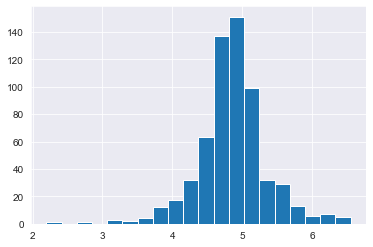

In [41]:
#For making the distribution normal applying log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 

test['LoanAmount_log'] = np.log(test['LoanAmount'])

### Feature Engineering

In [43]:
#Creating new features using existing features
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

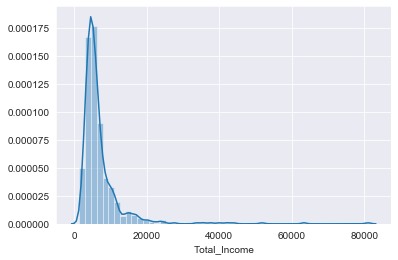

In [44]:
sns.distplot(train['Total_Income']);

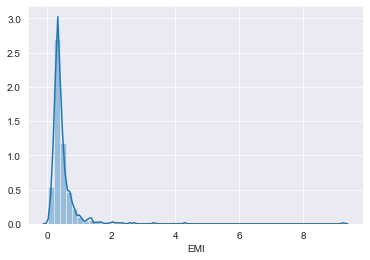

In [45]:
sns.distplot(train['EMI']);

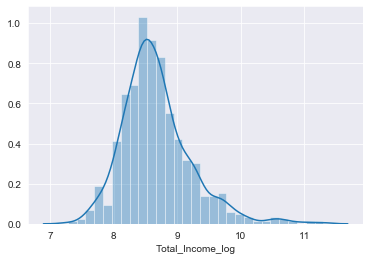

In [46]:
#Distribution of the features is not normal and left skewed so we will to apply log transformation
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']);

In [47]:
test['Total_Income_log'] = np.log(test['Total_Income'])

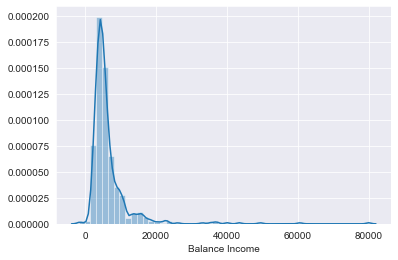

In [48]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)  

test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income']);

In [49]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [50]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [51]:
X = train.drop('Loan_Status',axis=1) 
y = train.Loan_Status

In [52]:
X = pd.get_dummies(X)

In [53]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,LoanAmount_log,Total_Income,EMI,Total_Income_log,Balance Income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,1.0,4.852030,5849.0,0.355556,8.674026,5493.444444,0,0,1
1,1,1,1,1,0,1.0,4.852030,6091.0,0.355556,8.714568,5735.444444,1,0,0
2,1,1,0,1,1,1.0,4.189655,3000.0,0.183333,8.006368,2816.666667,0,0,1
3,1,1,0,0,0,1.0,4.787492,4941.0,0.333333,8.505323,4607.666667,0,0,1
4,1,0,0,1,0,1.0,4.948760,6000.0,0.391667,8.699515,5608.333333,0,0,1


In [54]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [55]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
logit =LogisticRegression()
y_pred = logit.fit(X_train, y_train).predict(X_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
accuracy_score(y_test, y_pred)

0.7783783783783784

In [58]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[ 26,  39],
       [  2, 118]], dtype=int64)

In [59]:
print( metrics.classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        65
           1       0.75      0.98      0.85       120

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.81      0.78      0.75       185



In [60]:
predict_proba_df = pd.DataFrame( logit.predict_proba( X_test ) )
predict_proba_df.head()

,0,1
0,0.123533,0.876467
1,0.103567,0.896433
2,0.228973,0.771027
3,0.285794,0.714206
4,0.130750,0.869250


In [61]:
#Initializing the DataFrame with actual class labels
test_results_df = pd.DataFrame({'actual': y_test } )
test_results_df = test_results_df.reset_index()
## Assigning the probability values for class label 1
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
test_results_df.head()

,index,actual,chd_1
0,350,1,0.876467
1,377,1,0.896433
2,163,1,0.771027
3,609,1,0.714206
4,132,1,0.869250


In [62]:
auc_score = metrics.roc_auc_score( test_results_df.actual,test_results_df.chd_1)
round( float( auc_score ), 2 )

0.75

In [63]:
#FPR and TPRs for different threshold values
def draw_roc_curve( model,X_test, y_test ):
    test_results_df = pd.DataFrame({'actual': y_test })
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame(model.predict_proba(X_test))
    # selecting the probabilities that the test example belongs
    # to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    #Invoke roc_curve() to return fpr, tpr and threshold values.
    #Threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual,
                                              test_results_df.chd_1,
                                             drop_intermediate=False )
    auc_score = metrics.roc_auc_score( test_results_df.actual,
                                       test_results_df.chd_1 )
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='lower right')
    plt.show()
    return auc_score, fpr, tpr, thresholds

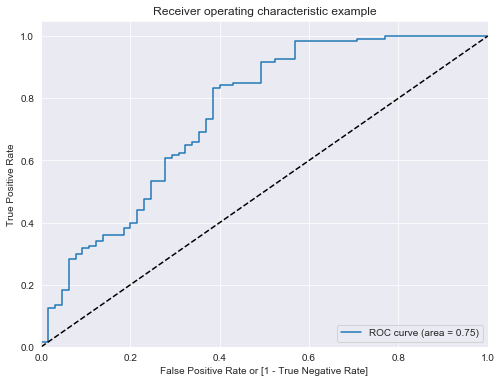

In [64]:
_, _, _, _ = draw_roc_curve( logit, X_test, y_test )

In [65]:
#Features are not in same scale applying standardscaler
standadizer = StandardScaler()
model = LogisticRegression()

standadizer.fit(X_train)
X_train_std = standadizer.transform(X_train)
X_test_std = standadizer.transform(X_test)

In [66]:
pipeline = make_pipeline(standadizer,model)

In [67]:
#Create kfold cross-validation
kf = KFold(n_splits=10,shuffle=True, random_state=42)

In [68]:
cv_results = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy',n_jobs=-1)

In [69]:
cv_results.mean()

0.8079058699101005

In [70]:
cv_results

array([0.75806452, 0.79032258, 0.79032258, 0.83870968, 0.85245902,
       0.85245902, 0.81967213, 0.75409836, 0.78688525, 0.83606557])

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =10, max_depth=10)
rf_pred = forest.fit(X_train_std, y_train).predict(X_test_std)

In [72]:
accuracy_score(y_test, rf_pred)

0.772972972972973

In [73]:
#Configuring parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
                     'n_estimators': [100,400],
                     'max_features': ['sqrt', 0.2]}]
#Initializing the RF classifier
radm_clf = RandomForestClassifier()
#Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
      tuned_parameters,
      cv=5,
      scoring='roc_auc')
#Fitting the training set
clf.fit(X_train_std, y_train)   

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [74]:
clf.best_score_

0.7875243951788718

In [75]:
clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

In [76]:
#Initializing the Random Forest Model with the optimal values
radm_clf = RandomForestClassifier(max_depth=10,n_estimators=100,max_features ='sqrt')
#Fitting the model with the training set
radm_clf.fit(X_train_std, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
pred_y = radm_clf.predict(X_test_std)
cm= confusion_matrix(y_test, y_pred)
cm

array([[ 26,  39],
       [  2, 118]], dtype=int64)

In [78]:
print(metrics.classification_report(y_test, pred_y ) )

              precision    recall  f1-score   support

           0       0.84      0.48      0.61        65
           1       0.77      0.95      0.85       120

    accuracy                           0.78       185
   macro avg       0.80      0.71      0.73       185
weighted avg       0.79      0.78      0.77       185



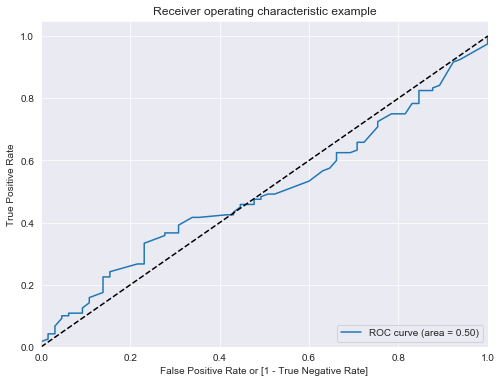

In [79]:
_, _, _, _ = draw_roc_curve(radm_clf, X_test, y_test )

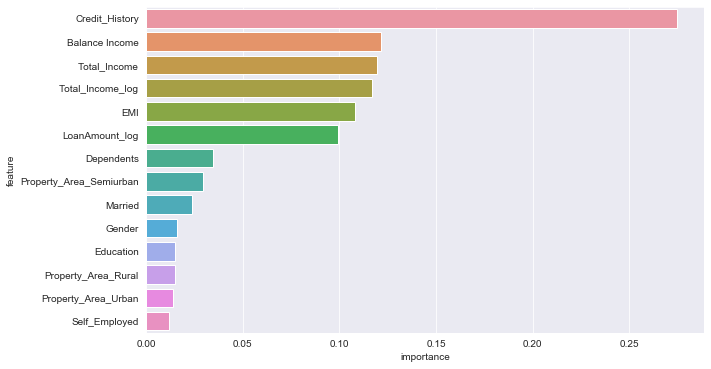

In [80]:
#Feature importances
feature_rank = pd.DataFrame( {'feature': X_train.columns,
                              'importance': radm_clf.feature_importances_ } )
#Sorting the features based on their importances with most
feature_rank = feature_rank.sort_values('importance', ascending =False)
plt.figure(figsize=(10, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

In [81]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
5,Credit_History,0.274855,27.485469
10,Balance Income,0.121477,39.633175
7,Total_Income,0.119584,51.591526
9,Total_Income_log,0.117108,63.302340
8,EMI,0.108018,74.104122
6,LoanAmount_log,0.099230,84.027131
2,Dependents,0.034570,87.484158
12,Property_Area_Semiurban,0.029683,90.452420
1,Married,0.023855,92.837951
0,Gender,0.015831,94.421087


In [82]:
from sklearn.ensemble import AdaBoostClassifier
## Initializing logistic regression to use as base classifier
log_clf = LogisticRegression()
## Initializing AdaBoost classifier with 50 classifers
ada_clf = AdaBoostClassifier(log_clf, n_estimators=100)
## Fitting AdaBoost model to training set
ada_clf.fit(X_train_std, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=100, random_state=None)

In [83]:
pred_y = ada_clf.predict(X_test )
cm= confusion_matrix(y_test, y_pred )
cm

array([[ 26,  39],
       [  2, 118]], dtype=int64)

In [84]:
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier( n_estimators=500,max_depth=15)
## Fitting gradient boosting model to training set
gboost_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [85]:
pred_y = gboost_clf.predict(X_test )
cm= confusion_matrix(y_test, y_pred )
cm

array([[ 26,  39],
       [  2, 118]], dtype=int64)

In [86]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [87]:
num_rounds = 100
kfold = StratifiedKFold(n_splits=5, random_state=42)
clf_XGB = XGBClassifier(n_estimators = num_rounds,
                        objective= 'binary:logistic',
                        seed=42)

In [88]:
clf_XGB.fit(X_train,y_train, early_stopping_rounds=20, eval_set=[(X_test,y_test)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
results = cross_val_score(clf_XGB, X_train,y_train,cv=kfold)

In [90]:
print ("\nxgBoost- CV Train : %.2f" % results.mean())
print ("xgBoost- Train : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_train), y_train))
print ("xgBoost- Test : %.2f" % metrics.accuracy_score(clf_XGB.predict(X_test), y_test))


xgBoost- CV Train : 0.80
xgBoost- Train : 0.89
xgBoost- Test : 0.81


In [91]:
pred_y = clf_XGB.predict(X_test )
cm= confusion_matrix(y_test, y_pred )
cm

array([[ 26,  39],
       [  2, 118]], dtype=int64)

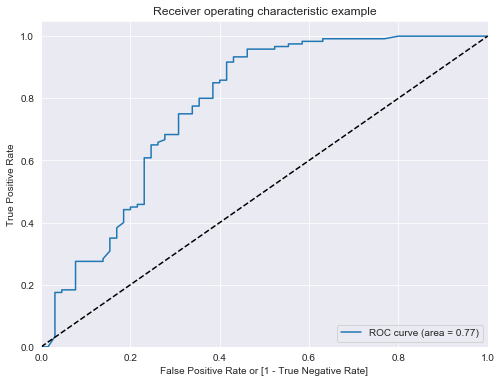

In [92]:
_, _, _, _ = draw_roc_curve(clf_XGB, X_test, y_test )

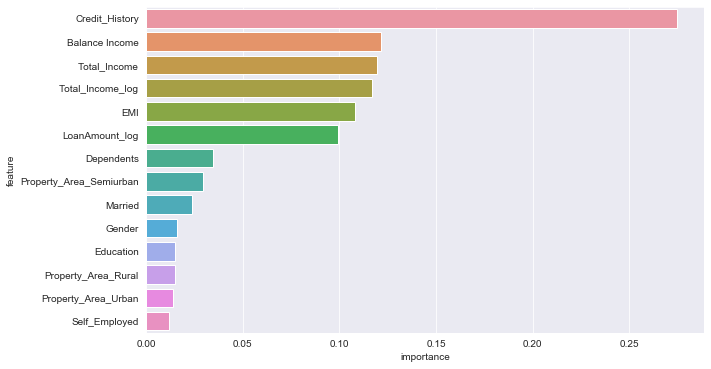

In [93]:
#Feature importances
feature_rank = pd.DataFrame( {'feature': X_train.columns,
                              'importance': radm_clf.feature_importances_ } )
#Sorting the features based on their importances with most
feature_rank = feature_rank.sort_values('importance', ascending =False)
plt.figure(figsize=(10, 6))
# plot the values
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

#### -XGBoost algorithm gives better performance compared to logistic regression, random forest and adaboost classifier